<a href="https://colab.research.google.com/github/andreacohen7/healthcare/blob/main/Stroke_Predictions_and_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Predictions
- Andrea Cohen
- 01.25.23

## Task
  - To predict whether a patient is likely to have a stroke based on the input parameters like gender, age, various diseases, and smoking status.

## Data:
Stroke Prediction Dataset.  
11 clinical features for predicting stroke events
- Source --
  - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download
- Context --
  - According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.  
  - This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevent information about the patient.


## Data Dictionary:

Variable Name	| Description
---| ---
id |	unique identifier
gender |	"Male", "Female" or "Other"
age |	age of the patient
hypertension |	0 if the patient doesn't have hypertension, 1 if the patient has hypertension
heart_disease |	0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
ever_married |	"No" or "Yes"
work_type |	"children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
Residence_type |	"Rural" or "Urban"
avg_glucose_level |	average glucose level in blood
bmi |	body mass index
smoking_status |	"formerly smoked", "never smoked", "smokes" or "Unknown"*
stroke |	1 if the patient had a stroke or 0 if not

 *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Preliminary Steps

#### Mount the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and inspect the data

#### Load the dataset

In [131]:
# load the dataset and check for unnecessary columns
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv', index_col = 0)
display(df.head())
display(df.info())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


None

  - There are no unnecessary columns.

#### Inspect the data

In [132]:
df.shape

(5110, 11)

  - There are 5110 rows and 11 columns.

In [133]:
# check datatypes and ensure that they match the data dictionary
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

  - gender, ever_married, work_type, Residence_type, and smoking_status are all datatype object
  - age, avg_glucose_level, and bmi are all datatype float64
  - hypertension, heart_disease, and stroke are all datatype int64
  - All datatypes are consistent with the data dictionary.

In [134]:
# check for outliers and obvious errors
display(df.describe(include='number'))
display(df.describe(exclude='number'))

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


  - There are no obvious outliers or errors in the data.

In [135]:
# check for duplicated rows
df.duplicated().sum()

0

  - There are 0 duplicates.

In [136]:
# check for missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

  - There are 201 missing values in bmi.
  - Options:
    - Dropping rows was not a good option because 3.93% of rows are missing data--too many (>2%) to just eliminate.  
    - Dropping columns was not a good option because bmi might be an important property for predicting a stroke. Also, <50% of the data are missing, too little to just eliminate.  
    - Creating a new category was not a good option because the data are type float instead of type object.  
    - Imputing missing values is a great option because the average (mean) value would likely be closest to the correct value that is missing.
  - Mean imputation will be performed on a copy of the dataset for machine learning--this imputation will be performed within a pipeline in order to prevent data leakage.

In [137]:
# check the categorical data for inconsistencies
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
for col in str_cols:
  print(f'Column= {col}')
  print(df[col].value_counts())
  print(' ')

Column= gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
 
Column= ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
 
Column= work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
 
Column= Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
 
Column= smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
 


  - There are no inconsistencies in categorical data.
  - For machine learning, categorical data will be one-hot encoded.

In [138]:
# check the balance of the target class
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

  - The target classes are severely imbalanced (95.13% of the samples did not have a stroke and 4.87% of the samples had a stroke).

### Univariate visualizations

#### Graph to view the distribution of the target class

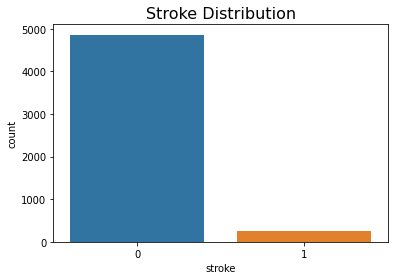

In [161]:
sns.countplot(data = df, x = 'stroke')
plt.title('Stroke Distribution', fontsize = 16);

  - The target class is significantly imbalanced--there were fewer strokes than not.

#### Graphs to view patient characteristics

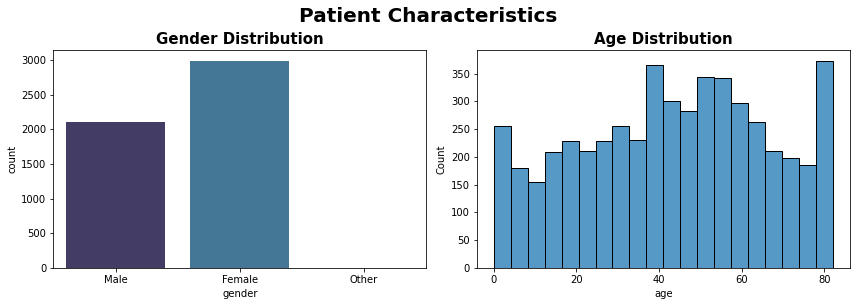

In [163]:
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
sns.countplot(data = df, x = 'gender',  palette = 'mako', ax = axes[0])
axes[0].set_title('Gender Distribution', fontsize = 15, fontweight = 'bold')
sns.histplot(data = df, x = 'age', ax = axes[1])
axes[1].set_title('Age Distribution', fontsize = 15, fontweight = 'bold')
fig.suptitle('Patient Characteristics', fontsize = 20, fontweight = 'bold', y = 1.05)
fig.tight_layout()

  - There were siginificantly more female patients than male or other patients.
  - There was no specific skew to the age distribution of patients, although there were spikes in the number of patients younger than 4, 37-41, 52-58, and over 78 years.

#### Graphs to view environmental and behavioral characteristics

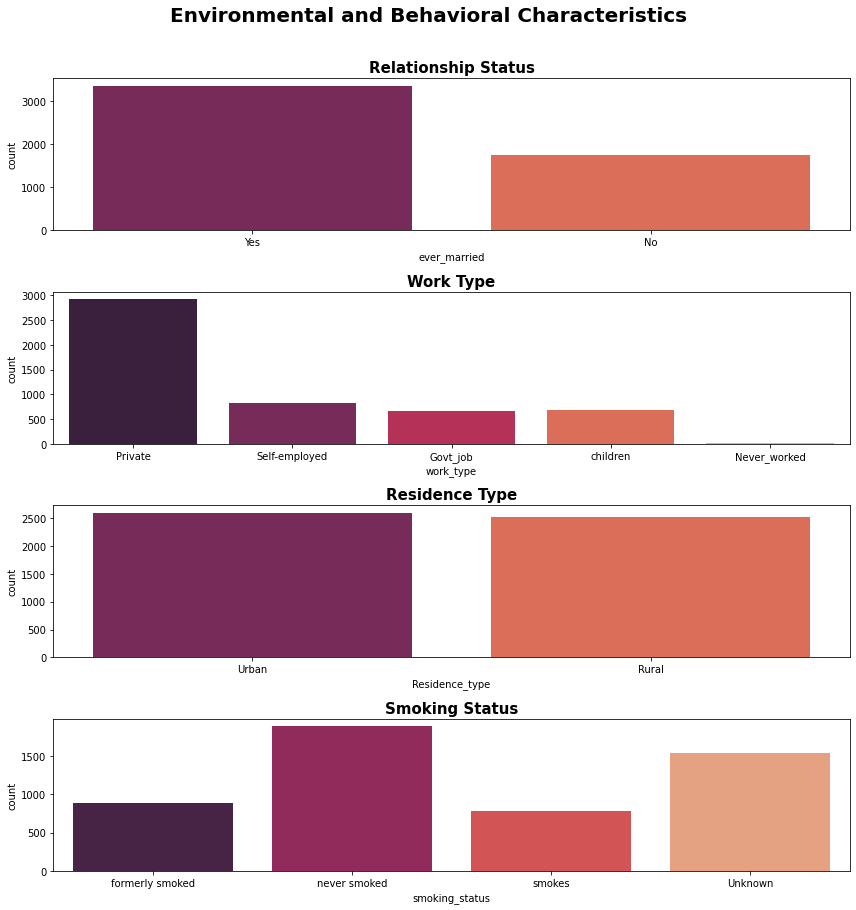

In [164]:
fig, axes = plt.subplots(ncols = 1, nrows = 4, figsize = (12, 12))
sns.countplot(data = df, x = 'ever_married', palette = 'rocket',  ax = axes[0])
axes[0].set_title('Relationship Status', fontsize = 15, fontweight = 'bold')
sns.countplot(data = df, x = 'work_type', palette = 'rocket', ax = axes[1])
axes[1].set_title('Work Type', fontsize = 15, fontweight = 'bold')
sns.countplot(data = df, x = 'Residence_type', palette = 'rocket', ax = axes[2])
axes[2].set_title('Residence Type', fontsize = 15, fontweight = 'bold')
sns.countplot(data = df, x = 'smoking_status', palette = 'rocket', ax = axes[3])
axes[3].set_title('Smoking Status', fontsize = 15, fontweight = 'bold')
fig.suptitle('Environmental and Behavioral Characteristics', fontsize = 20, fontweight = 'bold', y = 1.05)
fig.tight_layout()

  - The majority of patients were married.
  - The majority of patients were privately employed.
  - The distribution of residence types (urban and rural) was even.
  - The majority of patients had never smoked or their smoking status was unknown.

#### Graphs to view medical characteristics

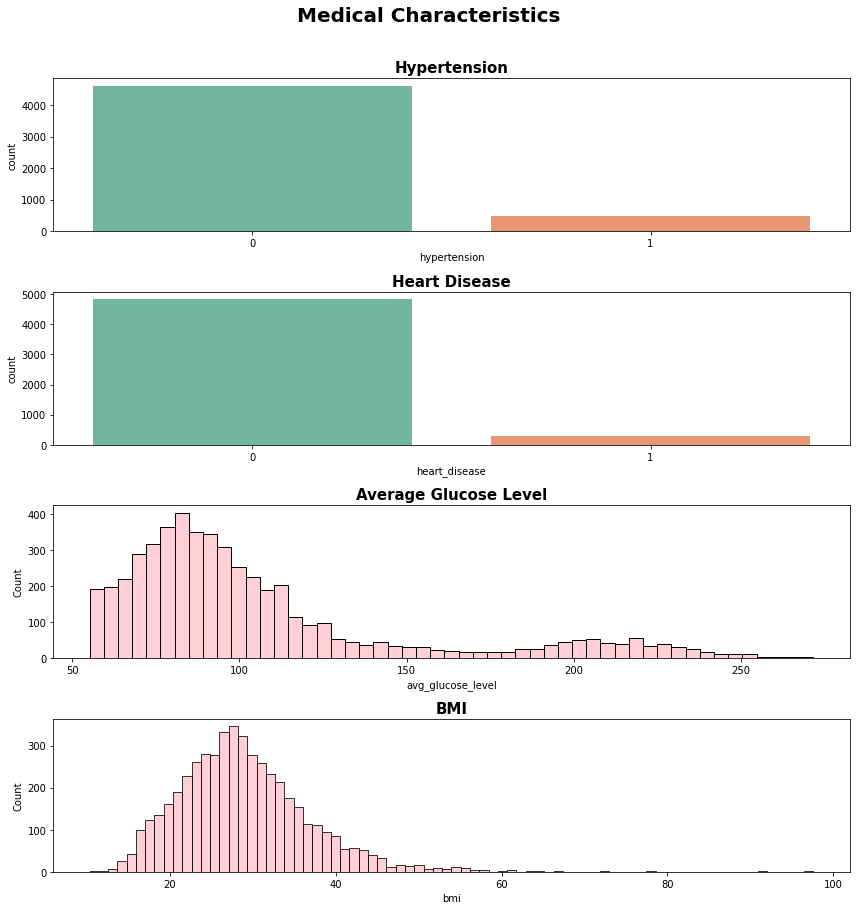

In [165]:
fig, axes = plt.subplots(ncols = 1, nrows = 4, figsize = (12, 12))
sns.countplot(data = df, x = 'hypertension', palette = 'Set2',  ax = axes[0])
axes[0].set_title('Hypertension', fontsize = 15, fontweight = 'bold')
sns.countplot(data = df, x = 'heart_disease', palette = 'Set2', ax = axes[1])
axes[1].set_title('Heart Disease', fontsize = 15, fontweight = 'bold')
sns.histplot(data = df, x = 'avg_glucose_level', color = 'pink', ax = axes[2])
axes[2].set_title('Average Glucose Level', fontsize = 15, fontweight = 'bold')
sns.histplot(data = df, x = 'bmi', color = 'pink', ax = axes[3])
axes[3].set_title('BMI', fontsize = 15, fontweight = 'bold')
fig.suptitle('Medical Characteristics', fontsize = 20, fontweight = 'bold', y = 1.05)
fig.tight_layout()

  - The distribution of hypertension is significantly unbalanced--the majority of patients did not have hypertension.
  - The distribution of heart disease is significantly unbalanced--the majority of patients did not have heart disease.
  - The distribution of glucose levels is right-skewed, with the majority of patients having lower average glucose levels.
  - The distribution of BMI is right skewed, with the majority of patients having lower BMI's.

#### Boxplots to view outliers

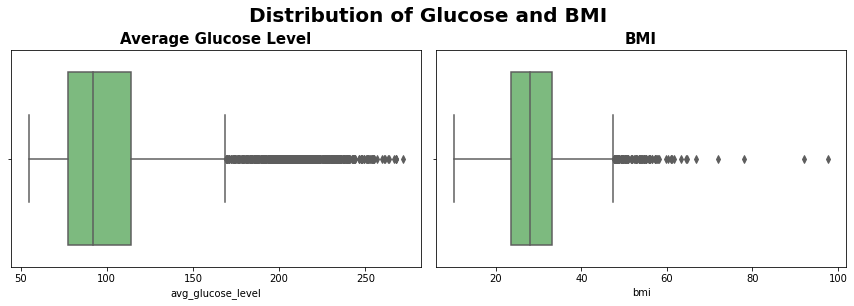

In [146]:
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
sns.boxplot(data = df, x = 'avg_glucose_level', palette = 'Greens',  ax = axes[0])
axes[0].set_title('Average Glucose Level', fontsize = 15, fontweight = 'bold')
sns.boxplot(data = df, x = 'bmi', palette = 'Greens', ax = axes[1])
axes[1].set_title('BMI', fontsize = 15, fontweight = 'bold')
fig.suptitle('Distribution of Glucose and BMI', fontsize = 20, fontweight = 'bold', y = 1.05)
fig.tight_layout()

  - Both the Average Glucose Level and the BMI distributions have outliers above the maximum values.

### Multivariate Exploratory Visualizations

#### Create a copy of the data for visualizations

In [33]:
vis_df = df.copy()

#### Correlation Heatmap

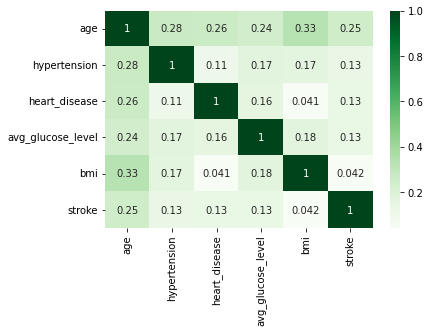

In [36]:
corr = vis_df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

  - None of the features are correlated with the target or with each other.

#### Do patient characteristics increase strokes?

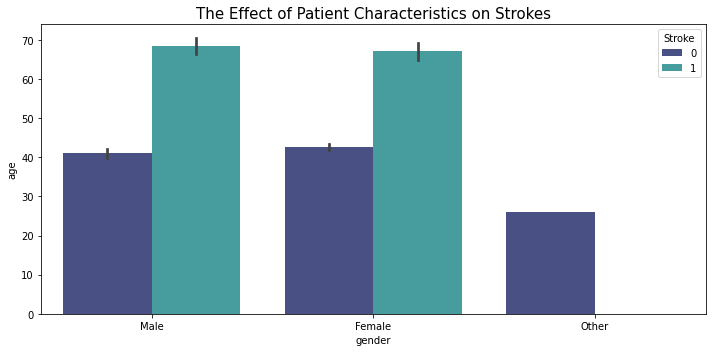

In [102]:
fig, axes = plt.subplots(figsize = (10, 5))
sns.barplot(data = vis_df, x = 'gender', y = 'age', hue = 'stroke', palette = 'mako')
plt.title('The Effect of Patient Characteristics on Strokes', fontsize = 15)
plt.legend(title = 'Stroke', loc = 1)
fig.tight_layout();

  - This barplot shows no relationship between the gender of the patient and strokes, regardless of age.  However, there is a relationship between the age of the patient and strokes--older patients have more strokes, regardless of their gender. 

#### Do environmental and behavioral characteristics increase strokes?

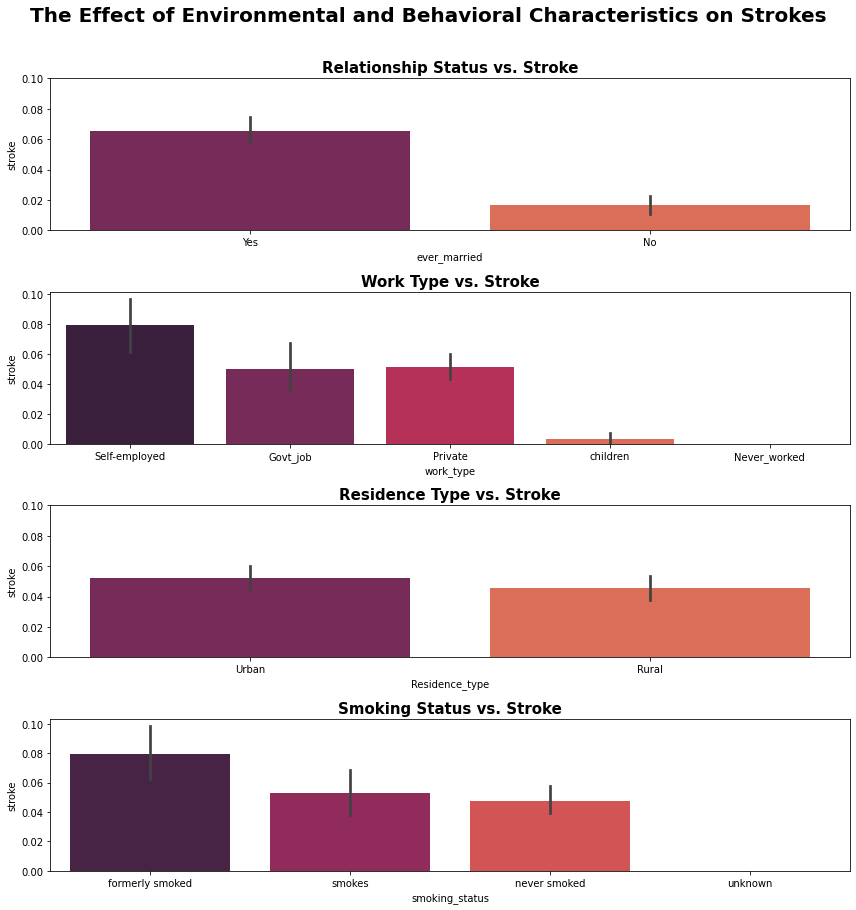

In [104]:
fig, axes = plt.subplots(ncols = 1, nrows = 4, figsize = (12, 12))
sns.barplot(data = vis_df, x = 'ever_married', y = 'stroke',  palette = 'rocket', ax = axes[0])
axes[0].set_title('Relationship Status vs. Stroke', fontsize = 15, fontweight = 'bold')
axes[0].set_ylim(bottom=0.00, top=0.10)
sns.barplot(data = vis_df, x = 'work_type', y = 'stroke', order = ['Self-employed', 'Govt_job', 'Private', 'children', 'Never_worked'], palette = 'rocket', ax = axes[1])
axes[1].set_title('Work Type vs. Stroke', fontsize = 15, fontweight = 'bold')
sns.barplot(data = vis_df, x = 'Residence_type', y = 'stroke', palette = 'rocket', ax = axes[2])
axes[2].set_title('Residence Type vs. Stroke', fontsize = 15, fontweight = 'bold')
axes[2].set_ylim(bottom=0.00, top=0.10)
sns.barplot(data = vis_df, x = 'smoking_status', y = 'stroke', order = ['formerly smoked', 'smokes', 'never smoked', 'unknown'], palette = 'rocket', ax = axes[3])
axes[3].set_title('Smoking Status vs. Stroke', fontsize = 15, fontweight = 'bold')
fig.suptitle('The Effect of Environmental and Behavioral Characteristics on Strokes', fontsize = 20, fontweight = 'bold', y = 1.05)
fig.tight_layout();

  - These barplots show that behavioral characteristics increase strokes, but environmental characteristics do not.
  - Mariage (even previous marriages) increases strokes.  
  - Work type (especially self-employed, government employees, and private employees) increases strokes.
  - Smoking status (especially former smokers) increases strokes.
  - There is no difference, though, in urban vs rural residences and strokes.

#### Do medical characteristics increase strokes?

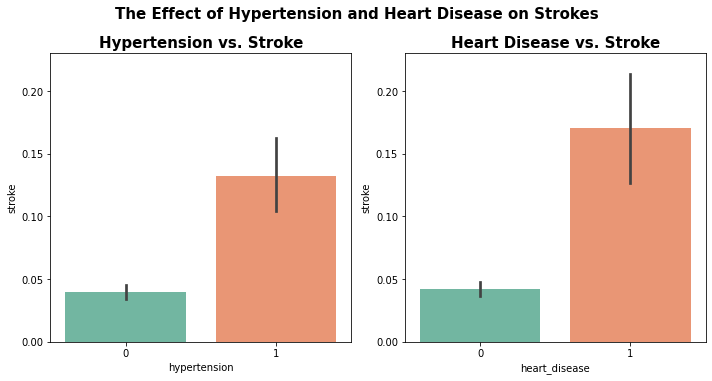

In [168]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 5))
sns.barplot(data = vis_df, x = 'hypertension', y = 'stroke', palette = 'Set2', ax = axes[0])
axes[0].set_title('Hypertension vs. Stroke', fontsize = 15, fontweight = 'bold')
axes[0].set_ylim(bottom=0.000, top=0.230)
sns.barplot(data = vis_df, x = 'heart_disease', y = 'stroke', palette = 'Set2', ax = axes[1])
axes[1].set_title('Heart Disease vs. Stroke', fontsize = 15, fontweight = 'bold')
axes[1].set_ylim(bottom=0.000, top=0.230)
plt.suptitle('The Effect of Hypertension and Heart Disease on Strokes', fontweight = 'bold', fontsize = 15, y = 1.05)
fig.tight_layout();

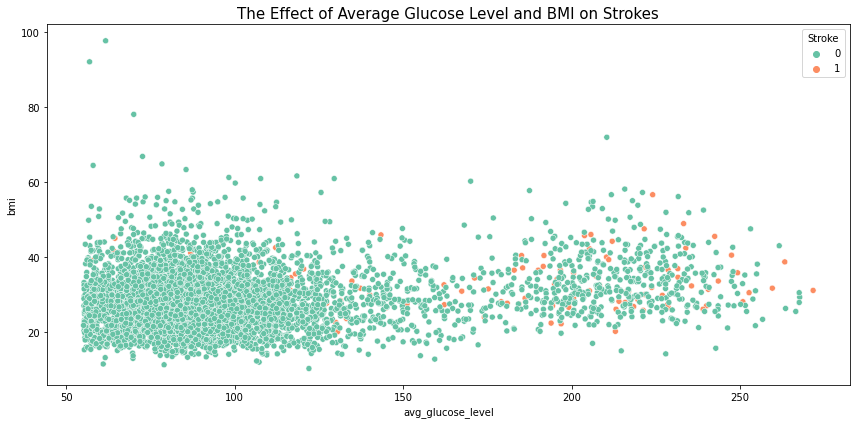

In [127]:
fig, axes = plt.subplots(figsize = (12, 6))
sns.scatterplot(data = vis_df, x = 'avg_glucose_level', y = 'bmi', hue = 'stroke', palette = 'Set2')
plt.title('The Effect of Average Glucose Level and BMI on Strokes', fontsize = 15)
plt.legend(title = 'Stroke', loc = 1)
fig.tight_layout();

  - These plots show that medical characteristics increase strokes.
  - The barplots show that hypertension and heart disease both increase strokes.
  - The scatterplot shows that the average glucose level increases strokes, but that BMI does not.